In [1]:
import sys
sys.path.append(r'C:\\Users\\Pedro\\Dropbox\\repository\\projects\\finances.git\\finances')
%matplotlib inline

In [2]:
import os
import numpy as np
import pandas as pd
import pyfolio as pf
import datetime

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Anaconda3\envs\finance\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [22]:
import porfolio.portfolio as pfl
import market.market_data as mkt_data

In [28]:
mkt=mkt_data.MarketData()
btc_rets = mkt.crypto_returns_history(symbols='BTC')

Loaded crypto currency database from C:\Users\Pedro\Dropbox\repository\projects\finances.git\finances\market\data_base\crypto_currencies\main_crypto_eur_database.csv


In [12]:
portfolio_assets = {
    #'BTC': 0.007,
    'ETH': 0.7,
    'XRP': 1001,
    #'ADA': 926,
    #'XLM': 929.07,
    #'LTC': 1.0,
    #'TRX': 2760,
    #'UBQ': 18.222,
    #'BIS': 36.6,
    #'IOTA': 47.553,
    #'EMC2': 45,
    #'FUN': 633.366,
    #'ADST': 136.71
    }

In [13]:
backtest_portfolio = pfl.PortFolio(
    assets = portfolio_assets,
    name= 'BackTestPortfolio'
    )

C:\Users\Pedro\Dropbox\repository\projects\finances.git\finances\porfolio\BackTestPortfolio
Data base not existent yet.


In [14]:
my_date = datetime.date(2017, 7, 1)
portfolio_value = backtest_portfolio.get_assets_value_since(date=my_date)

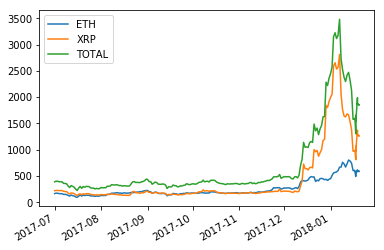

In [15]:
portfolio_value.plot()

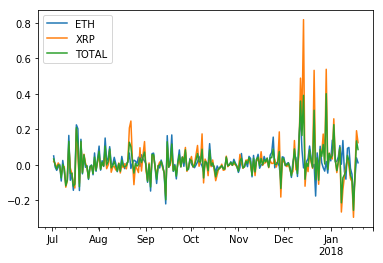

In [26]:
returns = backtest_portfolio.get_crypto_returns_history().dropna(how='any')
returns.plot()

2017-11-21 00:00:00
Entire data start date: 2017-07-02
Entire data end date: 2018-01-19
In-sample months: 6
Out-of-sample months: 2


,All,In-sample,Out-of-sample
Annual return,593.1%,13.5%,50132.2%
Cumulative returns,372.0%,7.4%,339.6%
Annual volatility,129.4%,88.9%,191.2%
Sharpe ratio,2.11,0.58,4.16
Calmar ratio,10.45,0.31,883.03
Stability,0.59,0.24,0.82
Max drawdown,-56.8%,-44.0%,-56.8%
Omega ratio,1.53,1.11,2.28
Sortino ratio,3.92,0.87,8.99
Skew,1.42,0.13,1.06


C:\Anaconda3\envs\finance\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,56.77,2018-01-07,2018-01-17,NaT,NaN
1,44.01,2017-07-02,2017-07-16,2017-08-30,43
2,40.37,2017-08-31,2017-09-14,2017-11-23,61
3,15.67,2017-11-28,2017-12-07,2017-12-12,11
4,13.49,2017-12-21,2017-12-24,2017-12-27,5


C:\Anaconda3\envs\finance\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


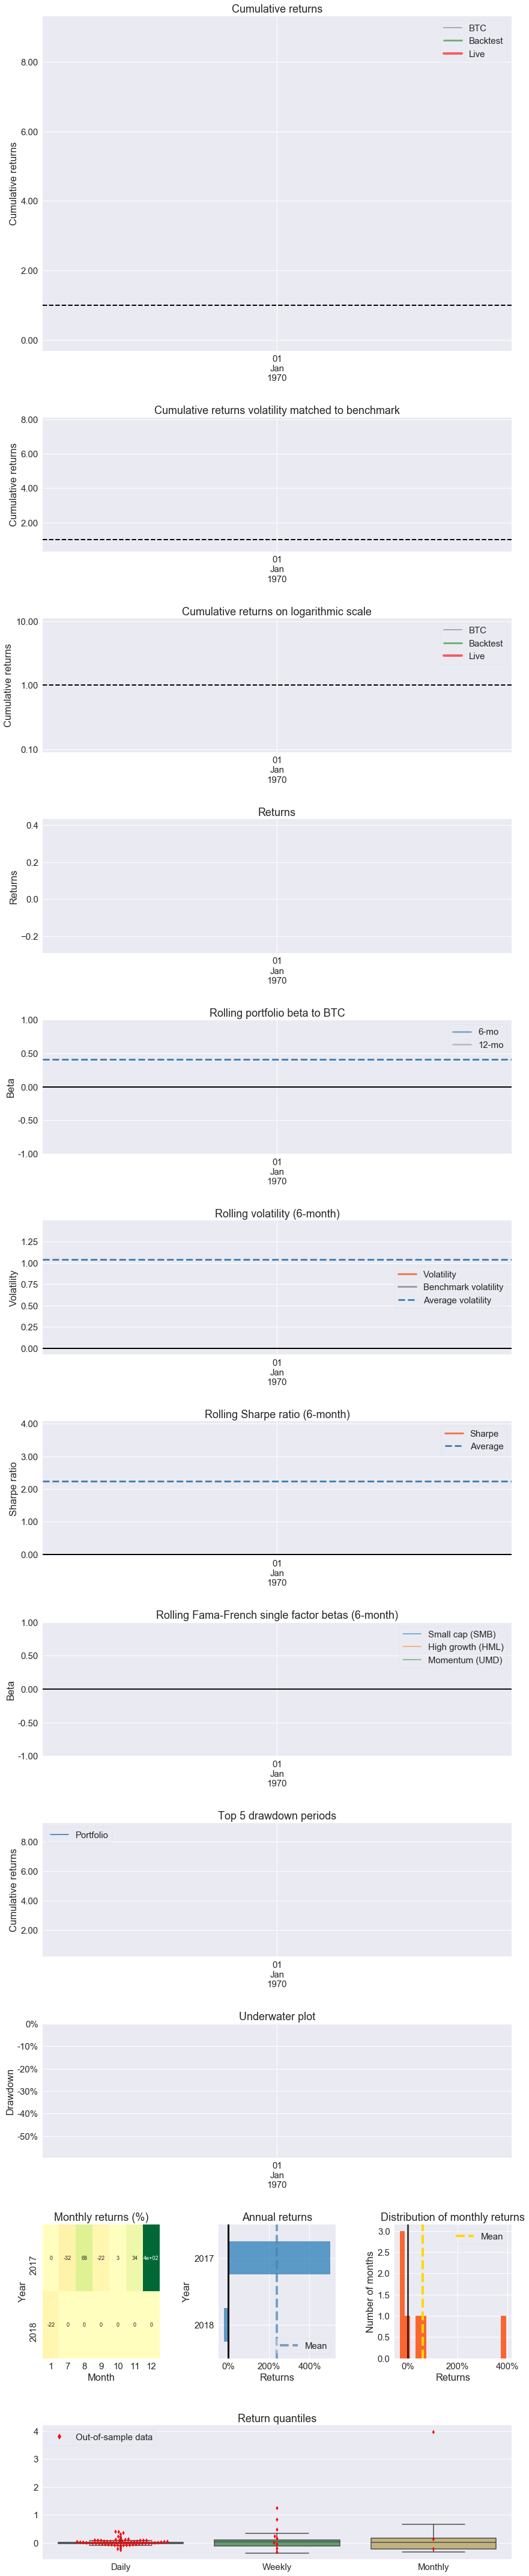

In [29]:
start_date = returns.index[-60]
print(start_date)
pf.create_returns_tear_sheet(returns['TOTAL'], benchmark_rets=btc_rets, live_start_date=start_date)

Running T model


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1260.69it/s]



Finished T model (required 813.74 seconds).

Running BEST model


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████████████████████████████████████████████████████████████████████████| 2500/2500 [27:52<00:00,  1.49it/s]C:\Anaconda3\envs\finance\lib\site-packages\pymc3\step_methods\hmc\nuts.py:451: UserWarning: The acceptance probability in chain 0 does not match the target. It is 0.889486757874, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))




Finished BEST model (required 1676.97 seconds).

Finished plotting Bayesian cone (required 0.33 seconds).

Finished plotting BEST results (required 1.39 seconds).

Finished computing Bayesian predictions (required 0.19 seconds).

Finished plotting Bayesian VaRs estimate (required 0.07 seconds).

Running alpha beta model


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████████████████████████████████████████████████████████████████████████| 2500/2500 [20:01<00:00,  2.08it/s]C:\Anaconda3\envs\finance\lib\site-packages\pymc3\step_methods\hmc\nuts.py:451: UserWarning: The acceptance probability in chain 0 does not match the target. It is 0.890906168592, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))




Finished running alpha beta model (required 1204.15 seconds).

Finished plotting alpha beta model (required 0.21 seconds).

Total runtime was 3697.06 seconds.


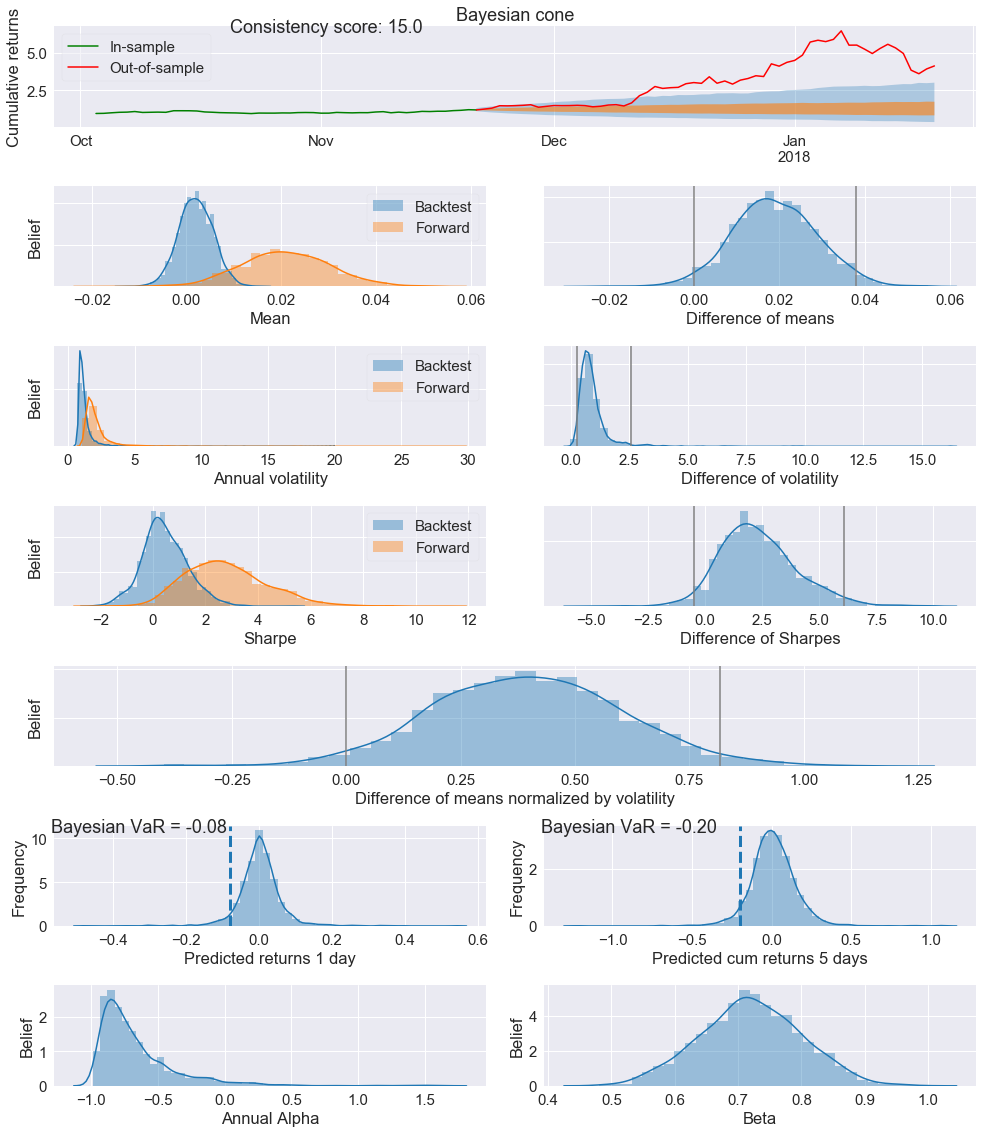

In [11]:
pf.create_bayesian_tear_sheet(returns['TOTAL'], benchmark_rets=returns['BTC'], live_start_date=start_date)